<a href="https://colab.research.google.com/github/xiaochengJF/MachineLearning/blob/master/Ex6_Linear_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-线性SVM

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
cd /content/drive/My Drive/MachineLearning/ex6-SVM

/content/drive/My Drive/MachineLearning/ex6-SVM


In [0]:
import numpy as np
import pandas as pd
import sklearn.svm
import seaborn as sns
import scipy.io as sio
import matplotlib.pyplot as plt

In [42]:
mat = sio.loadmat('./data/ex6data1.mat')
print(mat.keys())
data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data['y'] = mat.get('y')

data.head()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


# 可视化数据

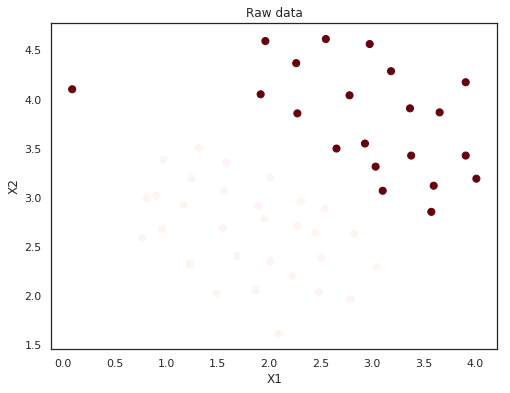

In [43]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['y'], cmap='Reds')
ax.set_title('Raw data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

<font face=楷体 color=skyblue size=4>
当$C=1$
</font>
    
<font face=楷体 color=green size=4>绿色链接:</font>

【1】[sklearn.svm.LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

In [44]:
svc1 = sklearn.svm.LinearSVC(C=1, loss='hinge')
svc1.fit(data[['X1', 'X2']], data['y'])
svc1.score(data[['X1', 'X2']], data['y'])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9803921568627451

In [0]:
data['SVM1 Confidence'] = svc1.decision_function(data[['X1', 'X2']])

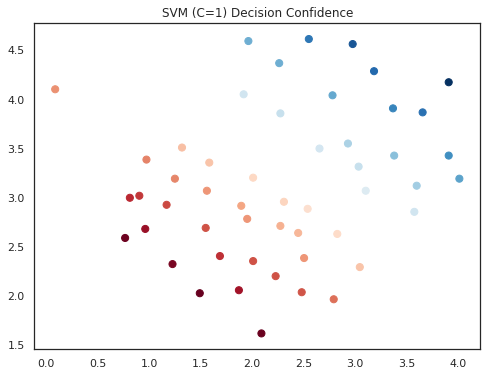

In [46]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM1 Confidence'], cmap='RdBu')
ax.set_title('SVM (C=1) Decision Confidence')
plt.show()

<font face=楷体 color=skyblue size=4>
当$C=100$
</font>    

<font face=楷体>
 
设置较大的C，试图让其对数据过拟合
</font>

In [47]:
svc100 = sklearn.svm.LinearSVC(C=100, loss='hinge')
svc100.fit(data[['X1', 'X2']], data['y'])
svc100.score(data[['X1', 'X2']], data['y'])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1.0

In [0]:
data['SVM100 Confidence'] = svc100.decision_function(data[['X1', 'X2']])

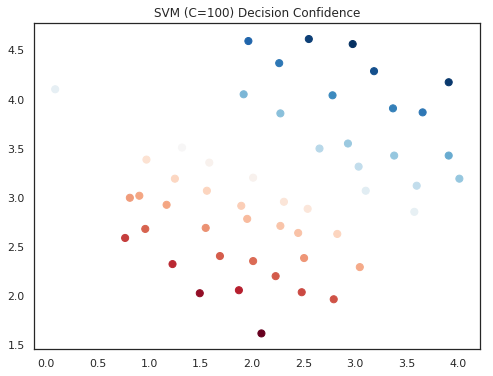

In [49]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM100 Confidence'], cmap='RdBu')
ax.set_title('SVM (C=100) Decision Confidence')
plt.show()

<font face=楷体>
将之前左侧边的分类为右侧
</font>

In [50]:
data.head()

,X1,X2,y,SVM1 Confidence,SVM100 Confidence
0,1.9643,4.5957,1,0.800330,3.759247
1,2.2753,3.8589,1,0.382712,1.828385
2,2.9781,4.5651,1,1.375362,4.767380
3,2.9320,3.5519,1,0.520679,1.597026
4,3.5772,2.8560,1,0.334258,0.155515


# 2-高斯核函数

In [0]:
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io as sio

In [0]:
# kernek function 高斯核函数
def gaussian_kernel(x1, x2, sigma):
    return np.exp(- np.power(x1 - x2, 2).sum() / (2 * (sigma ** 2)))

In [53]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussian_kernel(x1, x2, sigma)

0.32465246735834974

## 加载数据

In [54]:
mat = sio.loadmat('./data/ex6data2.mat')
print(mat.keys())
data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data['y'] = mat.get('y')

data.head()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [55]:
data.shape

(863, 3)

## 可视化数据

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


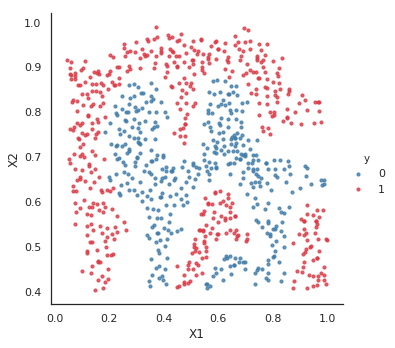

In [56]:
sns.set(context="notebook", style="white", palette=sns.diverging_palette(240, 10, n=2), color_codes=False)
sns.lmplot('X1', 'X2', hue='y', data=data, 
           size=5, 
           fit_reg=False, 
           scatter_kws={"s": 10}
          )
plt.show()

## sklearn内置高斯核函数

In [57]:
svc = svm.SVC(C=100, kernel='rbf', gamma=10, probability=True)
svc

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [58]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.9698725376593279

In [0]:
predict_prob = svc.predict_proba(data[['X1', 'X2']])[:, 0]

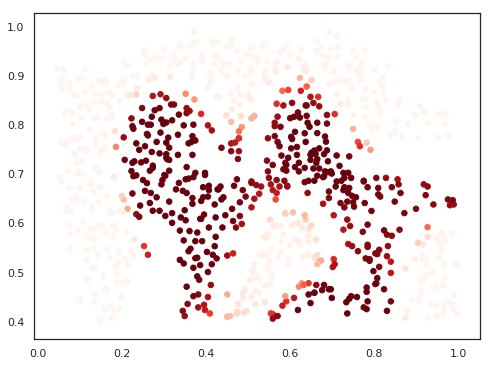

In [60]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=30, c=predict_prob, cmap='Reds')
plt.show()

# 3-寻找最优参数

In [0]:
from sklearn import svm
#from sklearn.grid_search import GridSearchCV  #sklearn.grid_search模块在0.18版本中被弃用
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import numpy as np
import pandas as pd
import scipy.io as sio

## 加载数据

In [62]:
mat = sio.loadmat('./data/ex6data3.mat')
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])


In [0]:
training = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
training['y'] = mat.get('y')

cv = pd.DataFrame(mat.get('Xval'), columns=['X1', 'X2'])
cv['y'] = mat.get('yval')

In [64]:
print(training.shape)
training.head()

(211, 3)


,X1,X2,y
0,-0.158986,0.423977,1
1,-0.347926,0.470760,1
2,-0.504608,0.353801,1
3,-0.596774,0.114035,1
4,-0.518433,-0.172515,1


In [65]:
print(cv.shape)
cv.head()

(200, 3)


,X1,X2,y
0,-0.353062,-0.673902,0
1,-0.227126,0.447320,1
2,0.092898,-0.753524,0
3,0.148243,-0.718473,0
4,-0.001512,0.162928,0


## 手动选择$C、\sigma$

In [0]:
candidate = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

In [67]:
# 做一些参数组合
combination = [(C, gamma) for C in candidate for gamma in candidate]
len(combination)

81

In [0]:
search = []

for C, gamma in combination:
    svc = svm.SVC(C=C, gamma=gamma)
    svc.fit(training[['X1', 'X2']], training['y'])
    search.append(svc.score(cv[['X1', 'X2']], cv['y']))

In [69]:
# 获取最优组合
best_score = search[np.argmax(search)]
best_param = combination[np.argmax(search)]

print(best_score, best_param)

0.965 (0.3, 100)


In [70]:
best_svc = svm.SVC(C=100, gamma=0.3)
best_svc.fit(training[['X1', 'X2']], training['y'])
ypred = best_svc.predict(cv[['X1', 'X2']])

print(metrics.classification_report(cv['y'], ypred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       113
           1       0.94      0.89      0.91        87

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



## sklearn GridSearchCV （网格搜索）  

<font face=楷体 color=green size=4>**绿色链接：**</font>  

【1】[sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)  
【2】[Python超参数自动搜索模块GridSearchCV](https://www.cnblogs.com/nwpuxuezha/p/6618205.html)

In [71]:
parameters = {'C': candidate, 'gamma': candidate}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, n_jobs=-1)
clf.fit(training[['X1', 'X2']], training['y'])

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100],
                         'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [73]:
clf.best_params_

{'C': 10, 'gamma': 30}

In [74]:
clf.best_score_

0.9004739336492891

In [75]:
ypred = clf.predict(cv[['X1', 'X2']])
print(metrics.classification_report(cv['y'], ypred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       113
           1       0.95      0.93      0.94        87

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



<font face=楷体>
    <font face=STCAIYUN color=red size=5>
        注意：
    </font>
    与手动选择的结果不同，因为GridSearch只使用部分训练数据进行训练，而另一部分部分数据作为cv集
</font>